In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,GridSearchCV
import numpy as np
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [4]:
data = pd.read_csv(r"C:\Users\ADMIN\Downloads\bank-full.csv",sep=';')

In [5]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

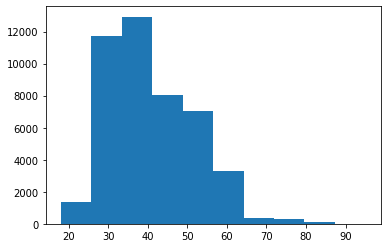

In [8]:
plt.hist(data.age)

<Axes: xlabel='age', ylabel='balance'>

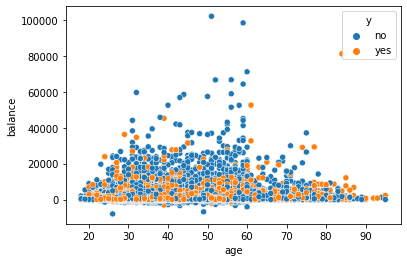

In [9]:
sns.scatterplot(x=data.age,y=data.balance,hue=data.y)

(array([3.9677e+04, 4.4250e+03, 8.6500e+02, 1.7600e+02, 4.3000e+01,
        1.1000e+01, 1.1000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  491.8,  983.6, 1475.4, 1967.2, 2459. , 2950.8, 3442.6,
        3934.4, 4426.2, 4918. ]),
 <BarContainer object of 10 artists>)

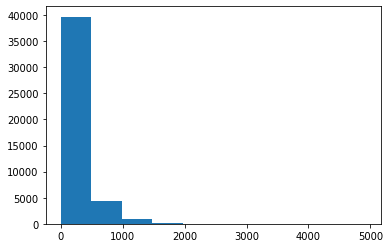

In [10]:
plt.hist(data.duration)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
x_data=data.drop('y',axis=1)
y_data=data['y']

In [14]:
data1=pd.get_dummies(x_data)

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin.           45211 non-null  bool 
 8   job_blue-collar      45211 non-null  bool 
 9   job_entrepreneur     45211 non-null  bool 
 10  job_housemaid        45211 non-null  bool 
 11  job_management       45211 non-null  bool 
 12  job_retired          45211 non-null  bool 
 13  job_self-employed    45211 non-null  bool 
 14  job_services         45211 non-null  bool 
 15  job_student          45211 non-null  bool 
 16  job_technician       4

In [17]:
data1.shape

(45211, 51)

In [18]:
y_data.shape

(45211,)

In [19]:
## splitting the data into train and test data 
x_train,x_test,y_train,y_test=train_test_split(data1,y_data,test_size=0.25,random_state=70)

In [20]:
##building the model 
model=LogisticRegression()

In [21]:
model.fit(x_train,y_train)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pre = pd.DataFrame(model.predict(x_test))

In [25]:
y_pre

,0
0,no
1,no
2,no
3,no
4,no
...,...
11298,no
11299,no
11300,no
11301,no


In [26]:
model.score(x_test,y_test)

0.8910023887463505

In [27]:
model.score(x_train,y_train)

0.8911761236286422